<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/Salary_dataset.csv')
df head

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


/tmp/ipython-input-10-389082340.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


coeficiente de coorelacion
r= 0.9782416184887598
coeficiente de determinacion 0.9569566641435086
Intervalo de confianza para b1
intervalo de confianza para b1 de  95%
8674.1187<b1<10225.8059

valor-p de Shapiro:  0.1952

valor_p de Breusch-Pagan:  0.5276

para x = 3.8, y = [60758.06078805]
para x = 4.5, y = [67373.03441307]
para x = 6.0, y = [81547.97789525]

           mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  62648.053252  1184.640332   60221.427536   65074.678968  50545.457145   

   obs_ci_upper  
0   74750.64936  


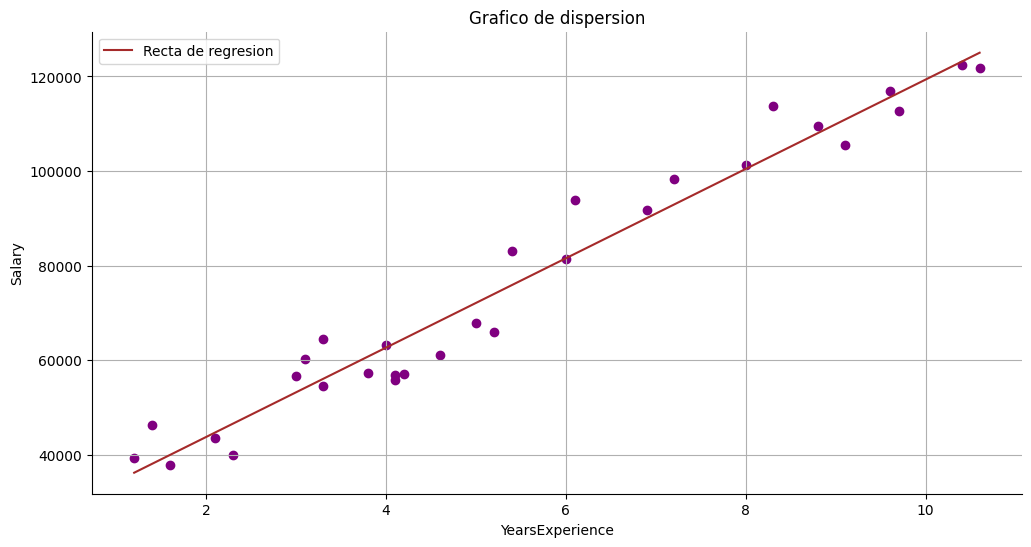

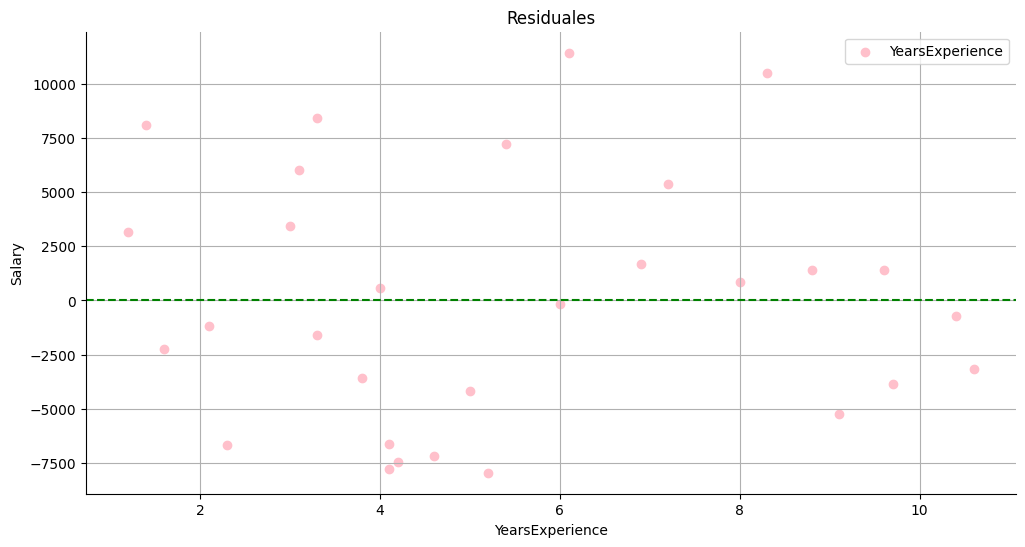

In [10]:
x = df['YearsExperience']
y = df['Salary']

# Paso 2: Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Grafico de dispersion")
plt.scatter(x, y, label="", color="purple")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)

#3 los datos soportan la suposición de linealidad?
# sí (se ve lineal

#4 coeficiente de coorelacion
print("coeficiente de coorelacion")
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print("r=",r)

#5 Coeficiente de determinacion
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante) # predicted values
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion",r2)

#6 Recta de regresion ajustada
plt.plot(x,yc,color="brown", label="Recta de regresion")
plt.legend()

#7 Intervalo de confianza
print("Intervalo de confianza para b1")
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha=1-nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f}<b1<{intervalo_de_confianza_b1[1]:0.4f}\n")

#8 cálculo de residuales
residuales = y - yc
plt.figure(figsize=(12,6), dpi=100)
plt.title("Residuales")
plt.scatter(x, residuales, label='YearsExperience', color="pink")
plt.axhline(y=0, color="green", linestyle="--")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.gca().spines[["top", "right"]].set_visible(False)

#9 Prueba de Shapiro-Wilk
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#10 Prueba de Breusch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

#11 Interpolación y extrapolación
print(f'para x = 3.8, y = {modelo.predict([1, 3.8])}')
print(f'para x = 4.5, y = {modelo.predict([1, 4.5])}')
print(f'para x = 6.0, y = {modelo.predict([1, 6.0])}\n')

#12 Tabla ANOVA
from statsmodels.formula.api import ols
modelo_lineal = ols('YearsExperience ~ Salary', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
modelo.predict([1,4])
print(modelo.get_prediction([1,4]).summary_frame(alpha=0.05))